In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn import preprocessing as preproc # load preprocessing function
import warnings
warnings.filterwarnings("ignore")
sns.set()
from sklearn import tree
from sklearn import ensemble


# Todo

## Time series
1. Gennemsnittet for de sidste N observationer per destination
2. Gennemsnittet for de sidste N søndage (og lørdage, mandage etc) eller bare delt op på hverdag/weekend
3. Kombi af 1. og 2. 

## Categorical
1. Tidspunkt på dagen 
2. Weekend/hverdag i stedet for ugedage

## "Weighted least squares "
1. Optimer den procentvise andel af data der bliver brugt (MSE) 

## Include more 
- Seatcapacity 
- Airline type 
- etc.

## Model parametre i Random forrest/regression trees

## BIC og AIC for decision tree




In [6]:
# read data
df = pd.read_excel("data/realised_schedule.xlsx")


In [7]:
df['LoadFactor'].iloc[:-1]

0        0.408451
1        0.189189
2        0.570423
3        0.333333
4        0.204301
           ...   
36764    0.090909
36765    0.522222
36766    0.532051
36767    0.602564
36768    0.417989
Name: LoadFactor, Length: 36769, dtype: float64

Model absolute error: 0.1506644907462391
Baseline error: 0.22196969536959446


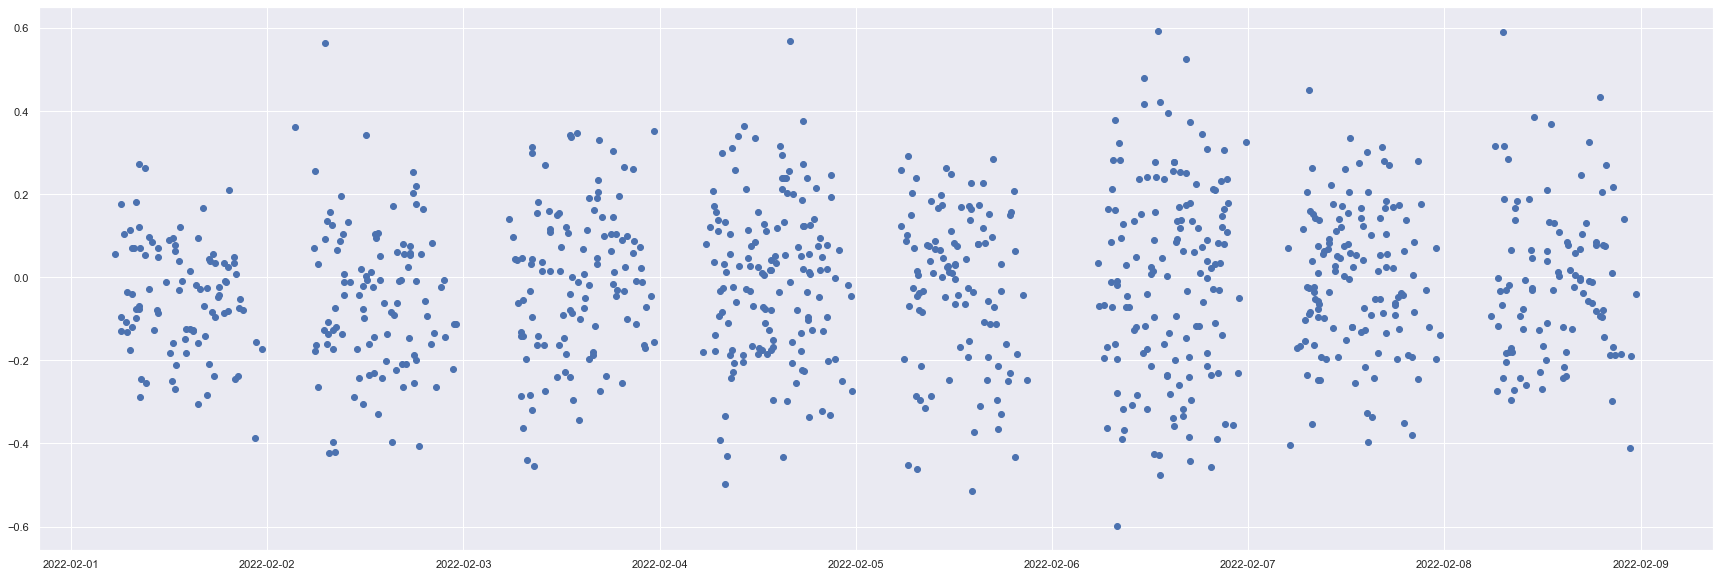

In [8]:


def create_simple_data(df):
    
    
    simple_data = df[['ScheduleTime','LoadFactor', 'Destination', 'FlightType']]
    simple_data['weekday']=df['ScheduleTime'].dt.day_of_week
    
    # create time
    #time = (simple_data.ScheduleTime - simple_data.ScheduleTime.iloc[0]) /pd.Timedelta('1 hour')
    #min_ = time.min()
    #max_ = time.max()
    #time =  (time - min_) / (max_ - min_)
    #simple_data['time'] = time
    
    #hej = pd.get_dummies(data1).drop(['ScheduleTime','LoadFactor' ], axis = 1)

    
    #for i in range(2,8):
     #   simple_data[f'time_{i}'] = time**i
    
    simple_data['week_day'] = simple_data.weekday.apply(lambda x: str(x))
    
    #old_load_factor = simple_data['LoadFactor'].iloc[:-1].copy()
    
    #simple_data = simple_data.drop(0, axis = 0).reset_index()
    
    #simple_data['old_load_factor'] = old_load_factor
    
    
    return pd.get_dummies(simple_data).drop(['weekday'], axis = 1)
    
#data = create_simple_data(df[df['Destination'] == 'CKE'])
data = create_simple_data(df[df['ScheduleTime'] > '2021-11-01'])


val_data = data[data['ScheduleTime'] >='2022-02-01']
train_data = data[data['ScheduleTime'] < '2022-02-01']

# Seperate X and y
y_val = val_data.LoadFactor.values
X_val = val_data.drop(["LoadFactor", 'ScheduleTime'], axis = 1).values

y_train = train_data.LoadFactor.values
X_train = train_data.drop(["LoadFactor", 'ScheduleTime'], axis = 1).values


model = tree.DecisionTreeRegressor(min_samples_leaf = 1)#, ccp_alpha = n)
model.fit(X_train,y_train)
yhat = model.predict(X_val)

model_err = np.mean(abs(y_val - yhat))
print(f'Model absolute error: {model_err}')

baseline_err = abs(y_val - train_data[train_data['ScheduleTime']>'2022-01-01'].LoadFactor.mean()).mean()
print(f'Baseline error: {baseline_err}')

fig, ax = plt.subplots(1,1, figsize = (30,10))
ax.scatter(val_data.ScheduleTime, y_val - yhat)

In [10]:
# random forrest
forest = ensemble.RandomForestRegressor(n_estimators = 100)
forest.fit(X_train,y_train)
yhat = forest.predict(X_val)


model_err = np.mean(abs(y_val - yhat))
print(f'Forest absolute error: {model_err}')


Forest absolute error: 0.15124437637157642


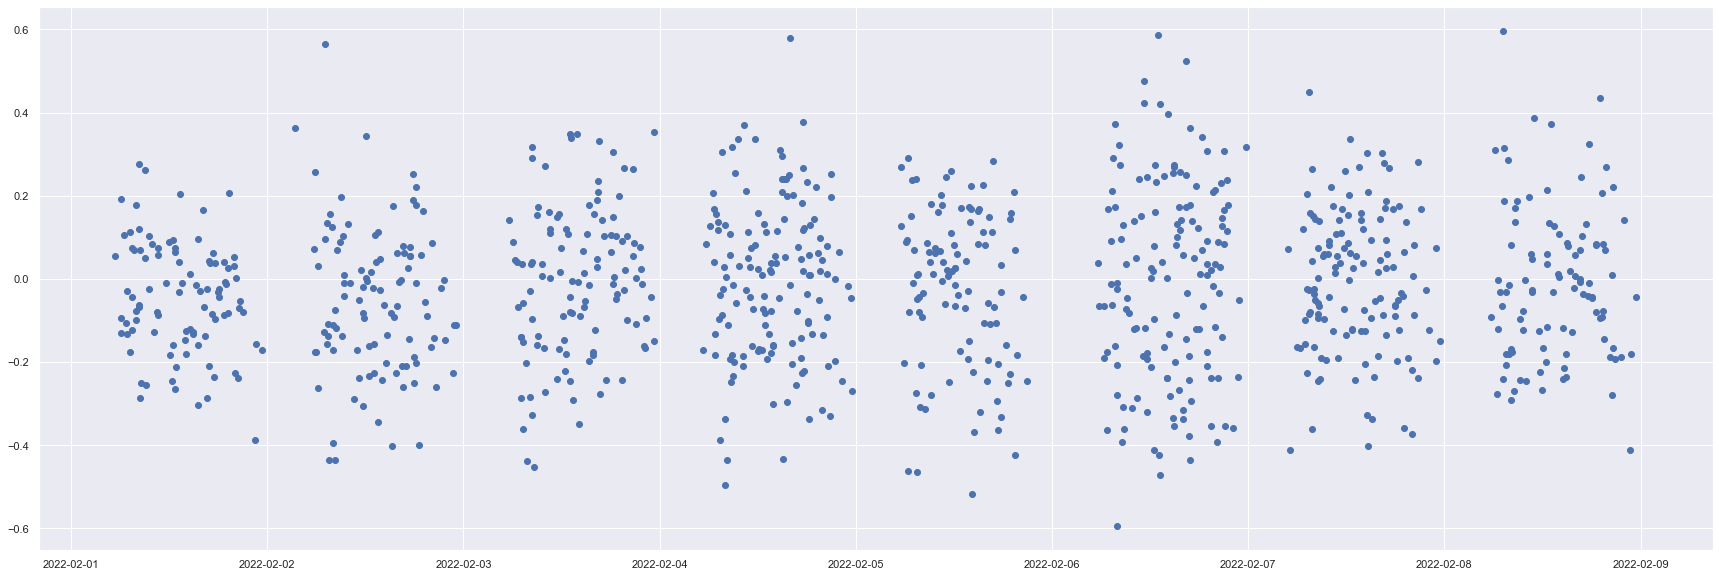

In [11]:
fig, ax = plt.subplots(1,1, figsize = (30,10))
ax.scatter(val_data.ScheduleTime, y_val - yhat)

In [41]:
#n_leafs = np.arange(1,30)
#ccps = np.linspace(0,0.5, 10)

#err = []
#for n in ccps:
#    model = tree.DecisionTreeRegressor(min_samples_leaf = 10, ccp_alpha = n)
#    model.fit(X_train,y_train)
#    yhat = model.predict(X_val)

#    err.append(np.mean(abs(y_val - yhat)))

0.2045481363147706


array([[5.16026937e-05, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.64424243e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.19232324e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.79625536e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.79694340e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.79823347e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])